# 1. Tests 

In [1]:
import numpy as np
import final_maze as mz
import matplotlib.pyplot as plt

In [2]:
maze = np.array ([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0 ,0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

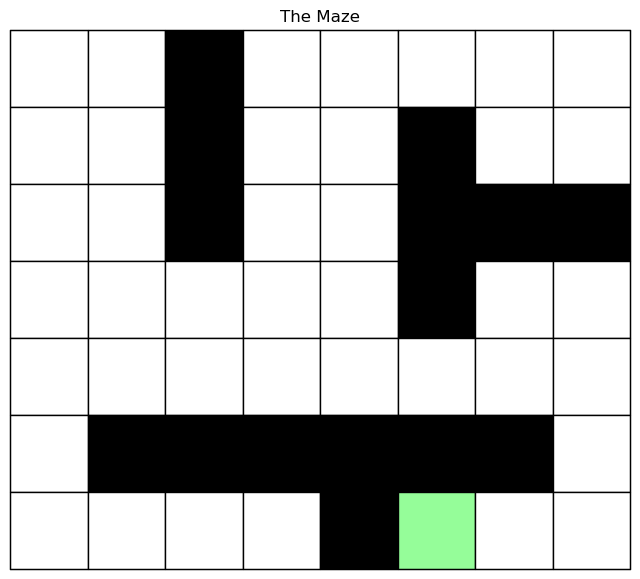

In [3]:
mz.draw_maze(maze)

In [4]:
# Create an environment maze
env = mz.Maze(maze)
dict1, dict2 = env.dict_states()
print(dict1)

{0: [(0, 0), (0, 0)], 1: [(0, 0), (0, 1)], 2: [(0, 0), (0, 2)], 3: [(0, 0), (0, 3)], 4: [(0, 0), (0, 4)], 5: [(0, 0), (0, 5)], 6: [(0, 0), (0, 6)], 7: [(0, 0), (0, 7)], 8: [(0, 0), (1, 0)], 9: [(0, 0), (1, 1)], 10: [(0, 0), (1, 2)], 11: [(0, 0), (1, 3)], 12: [(0, 0), (1, 4)], 13: [(0, 0), (1, 5)], 14: [(0, 0), (1, 6)], 15: [(0, 0), (1, 7)], 16: [(0, 0), (2, 0)], 17: [(0, 0), (2, 1)], 18: [(0, 0), (2, 2)], 19: [(0, 0), (2, 3)], 20: [(0, 0), (2, 4)], 21: [(0, 0), (2, 5)], 22: [(0, 0), (2, 6)], 23: [(0, 0), (2, 7)], 24: [(0, 0), (3, 0)], 25: [(0, 0), (3, 1)], 26: [(0, 0), (3, 2)], 27: [(0, 0), (3, 3)], 28: [(0, 0), (3, 4)], 29: [(0, 0), (3, 5)], 30: [(0, 0), (3, 6)], 31: [(0, 0), (3, 7)], 32: [(0, 0), (4, 0)], 33: [(0, 0), (4, 1)], 34: [(0, 0), (4, 2)], 35: [(0, 0), (4, 3)], 36: [(0, 0), (4, 4)], 37: [(0, 0), (4, 5)], 38: [(0, 0), (4, 6)], 39: [(0, 0), (4, 7)], 40: [(0, 0), (5, 0)], 41: [(0, 0), (5, 1)], 42: [(0, 0), (5, 2)], 43: [(0, 0), (5, 3)], 44: [(0, 0), (5, 4)], 45: [(0, 0), (5, 5)

In [5]:
array_3d = env.compute_transitions()
print(array_3d)

[[[0.         0.         0.         0.         0.        ]
  [0.33333333 0.33333333 0.         0.33333333 0.        ]
  [0.         0.         0.         0.         0.        ]
  ...
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]]

 [[0.5        0.5        0.         0.5        0.        ]
  [0.         0.         0.         0.         0.        ]
  [0.33333333 0.33333333 0.         0.33333333 0.        ]
  ...
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.         0.        ]
  [0.33333333 0.33333333 0.         0.33333333 0.        ]
  [0.         0.         0.         0.         0.        ]
  ...
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.       

In [6]:
reward = env.compute_rewards()
print(reward)

[[ -5. -20.  -5. -20. -75.]
 [ -5. -20.  -5. -20.  -5.]
 [ -5. -20.  -5. -20.  -5.]
 ...
 [ -5.  -5. -20.  -5. -20.]
 [ -5.  -5. -20.  -5. -20.]
 [ -5.  -5. -20. -75. -20.]]


# 2. Task - Basic maze

## Part a : MDP formulation

We propose the following MDP formulation: 

#### State space $\mathcal{S}$
The space of state is simply the cartesian product of all the squares of the grid accessible by the player times all the squares of the grid accessible by the minotaur or the whole grid, hence :
$$\mathcal{s} = \textrm{41 $\times$ 56 states}$$

#### Action Space $\mathcal{A}$
This are all the possible actions in the MDP

$$\mathcal{A} = \lbrace \textrm{up, down, right, left, stay}\rbrace$$

#### Transition Probabilities $\mathbb{P}$

- If at position $c$ taking action $a$ does not lead to a wall or an obstacle or being caught by the minotaur but to another position $c'$, then $\mathbb{P}(c' \vert c, a) = 1$. 
- If at  position  $c$ taking  move $a$ leads to a wall or an obstacle, the player remains in his position $c$, then $\mathbb{P}(c \vert c, a) = 1$.
- For the Minotaur the transition probabilities $\mathbb{P}(c' \vert c, a) = 1/4$ for each move or $1/3$, $1/2$ if the minotaur is at one border or two border.

Hence the Transition probabilies is $\mathbb{P}(s' \vert s, a) = 1/4$ for each move or $1/3$, $1/2$ if the minotaur is at one border or two border.

#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -20$
   - If at state $s$, taking action $a$, leads to being caught then the reward $r(s,a) = -75$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -5$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 10$.

#### Discount Factor $\mathcal{\Lambda}$
The discount factor would be  $\lambda^{(t-1)}$

## Part b : MDP formulation

We propose the following MDP formulation: 

#### State space $\mathcal{S}$
The space of state is simply the cartesian product of all the squares of the grid accessible by the player times all the squares of the grid accessible by the minotaur or the whole grid, hence :
$$\mathcal{s} = \textrm{41 $\times$ 56 states}$$

#### Action Space $\mathcal{A}$
This are all the possible actions in the MDP

$$\mathcal{A} = \lbrace \textrm{up, down, right, left, stay}\rbrace$$

#### Transition Probabilities $\mathbb{P}$

- If at position $c$ taking action $a$ does not lead to a wall or an obstacle or being caught by the minotaur but to another position $c'$, then $\mathbb{P}(c' \vert c, a) = 1$. 
- If at  position  $c$ taking  move $a$ leads to a wall or an obstacle, the player remains in his position $c$, then $\mathbb{P}(c \vert c, a) = 1$.
- For the Minotaur the transition probabilities $\mathbb{P}(c' \vert c, a) = 1/4$ for each move or $1/3$, $1/2$ if the minotaur is at one border or two border.

Hence the Transition probabilies is $\mathbb{P}(s' \vert s, a) = 1/4$ for each move or $1/3$, $1/2$ if the minotaur is at one border or two border.

#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -20$
   - If at state $s$, taking action $a$, leads to being caught then the reward $r(s,a) = -75$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -5$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 10$.

#### Discount Factor $\mathcal{\Lambda}$
The discount factor would be  $\lambda^{(t-1)}$
#### Differences
In the second case, it is less likely for the minotaur to catch the player, since the player can always adapt to changes basen on to the movement of the minotaur. In this case the player would always be ahaed of the minoaur.
but in some cases the minotaur will catch the player every time assuming that the monitaur is also better than the hazard, we can consider the following situation where the player starts at the square (6,3) and the monitaur tries to block him the road at the square (6,2), since the minotaur and the player do not play simultaneously, they will not be able to exchange their square, so the minotaur will win.


# 2. Task - Dynamic Programming

Before solving the MDP problem, recall that the finite horizon objective function is 
$$
    \mathbb{E} \Big[ \sum_{t=0}^T r(s_t, a_t) \Big],
$$
where $T$ is the horizon.
Recall the Bellman equation 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V(s) = \max_{a \in \mathcal{A}} \Big\lbrace r(s,a) + \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,a) V(s') \Big\rbrace
\end{equation}
The dynamic programming solution for the finite horizon MDP problem consists of solving the above backward recursion. The method `maze.dynamic_programming` achieves this. 


## Part c : Find a policy that maximizes the probability of leaving the maze alive for T = 20


In [7]:
# Create an environment maze
env = mz.Maze(maze)
# env.show()

In [11]:
start_agent     = (0,0)
start_minotaur  = (1,1)
horizon = 20

V, policy = mz.dynamic_programming(env, horizon, env.rewards, env.transition_probabilities)

path, victory, policy = env.simulateDynProg(start_agent, start_minotaur, V, policy)
print(victory)

True


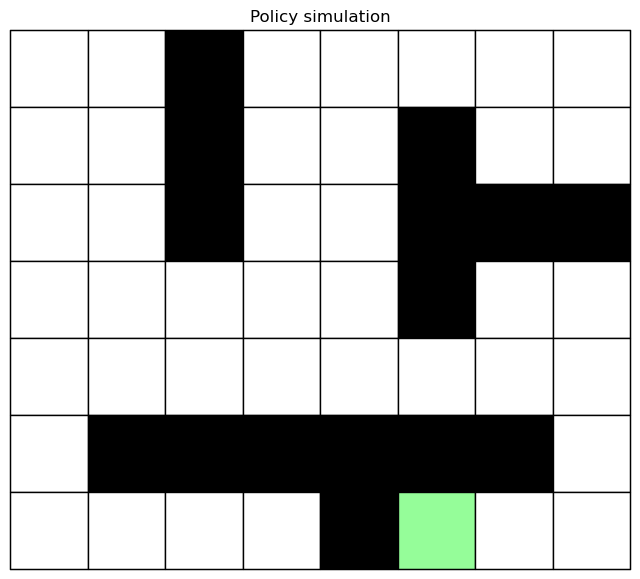

In [12]:
mz.animate_solution(env.maze, path, policy, env, 'DynProg')

In [13]:
record_victory = []
start_agent     = (0,0)
start_minotaur  = [(4,4),(3,3),(3,4),(4,3),(2,2),(2,3),(3,2),(4,2),(2,4),(5,7)]
horizon = 20
V, policy = mz.dynamic_programming(env, horizon, env.rewards, env.transition_probabilities)

for start_mino in start_minotaur:
    for _ in range(1000):
        path, victory, policy = env.simulateDynProg(start_agent, start_mino, V, policy)
        record_victory.append(victory)
        
sum(record_victory)/10000

0.8436

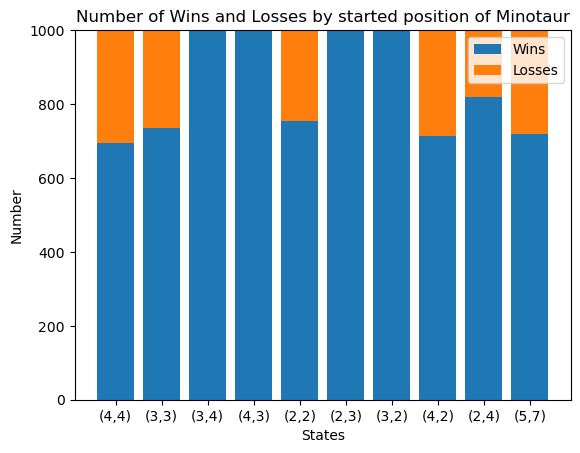

In [14]:
# Example data 
states = ["(4,4)","(3,3)","(3,4)","(4,3)","(2,2)","(2,3)","(3,2)","(4,2)","(2,4)","(5,7)"]
wins = [sum(record_victory[1000*k:1000*(k+1)+1]) for k in range(10)]
losses = [1000-sum(record_victory[1000*k:1000*(k+1)+1]) for k in range(10)]

# Create a histogram
plt.bar(states, wins, label='Wins')
plt.bar(states, losses, bottom=wins, label='Losses')

# Add legends and titles
plt.xlabel('States')
plt.ylabel('Number')
plt.title('Number of Wins and Losses by started position of Minotaur')
plt.legend()

# Show the plot
plt.show()

## Part d : For T = 2, ..., 30 compute a policy that maximizes the probability of leaving the maze alive


In [15]:
record_victory = []
accuracy = []
start_agent     = (0,0)
start_minotaur  = (4,4)

for T in range(2,32):
    record_victory.append([])
    V, policy = mz.dynamic_programming(env, T, env.rewards, env.transition_probabilities)
    for _ in range(1000):
        path, victory, policy = env.simulateDynProg(start_agent, start_mino, V, policy)
        record_victory[T-2].append(victory)
            
    accuracy.append(sum(record_victory[T-2])/1000)

In [16]:
accuracy

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999,
 1.0,
 0.669,
 0.717,
 0.719,
 0.715,
 0.705,
 0.709,
 0.733,
 0.702,
 0.695,
 0.723,
 0.7,
 0.712,
 0.717,
 0.727,
 0.702,
 0.71,
 0.702,
 0.691]

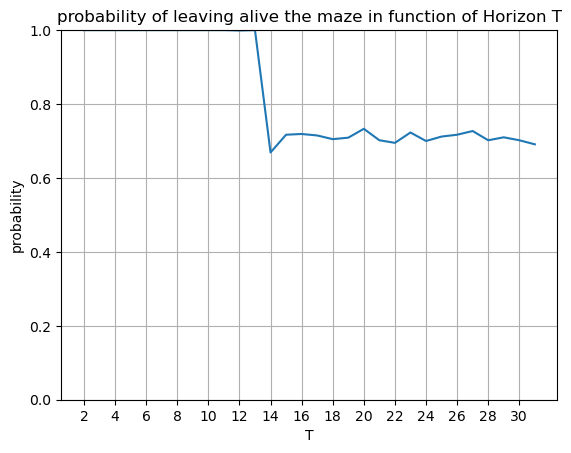

In [17]:
# ploting the accuracy which is also the probability of leaving the maze alive
T = [k for k in range(2,32)]
plt.plot(T, accuracy)

plt.ylim(0, 1)
plt.xticks(T[::2]) 
plt.grid(True)
# add title 
plt.xlabel('T')
plt.ylabel('probability')
plt.title('probability of leaving alive the maze in function of Horizon T')

# Afficher le graphique
plt.show()

### We assume now that the minotaur is allowed to stand still 


# 2. Task - Value Iteration 

In [18]:
# Create an environment maze
env = mz.Maze(maze)
# env.show()

In [20]:
start_agent     = (6,3)
start_minotaur  = (2,3)
gamma = 0.9
epsilon = 0.3

V, policy = mz.value_iteration(env, gamma, epsilon, env.rewards, env.transition_probabilities, env.n_states)

path, victory, policy = env.simulateValIter(start_agent, start_minotaur, V, policy)
print(victory)

True


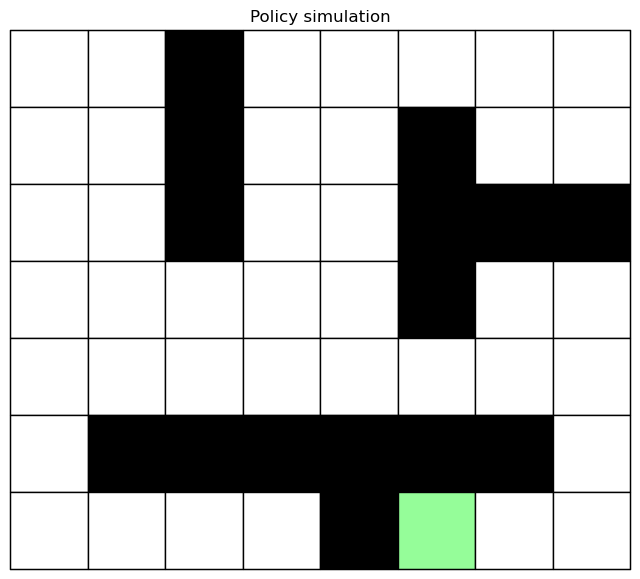

In [21]:
mz.animate_solution(env.maze, path, policy, env, 'ValIter')

In [22]:
record_victory = []
start_agent     = [(0,0), (0,7), (6,0),(6,3)]
start_minotaur  = (4,4)

gamma = 0.7
epsilon = 0.2
V, policy = mz.value_iteration(env, gamma, epsilon, env.rewards, env.transition_probabilities,env.n_states)

for start in start_agent:
    for _ in range(2500):
        path, victory, policy = env.simulateValIter(start, start_minotaur, V, policy)
        record_victory.append(victory)
        
sum(record_victory)/10000

0.8569

### Value iteration considering the poisonning of the agent
### Part e and f

In [23]:
# Create an environment maze
env = mz.Maze(maze)
# env.show()

In [25]:
start_agent     = (0,0)
start_minotaur  = (6,6)
gamma = 0.9
epsilon = 0.3

V, policy = mz.value_iteration(env, gamma, epsilon, env.rewards, env.transition_probabilities, env.n_states)

path, victory, policy, why = env.simulateValIterPoisonnig(start_agent, start_minotaur, V, policy)
print(victory, why)

True Exit


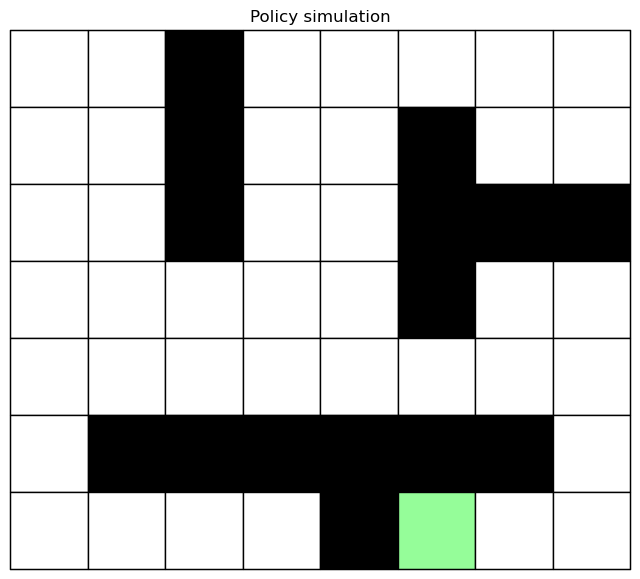

In [26]:
mz.animate_solution(env.maze, path, policy, env,'ValIter')

In [27]:
record_victory = []
start_agent     = [(0,0), (0,7), (6,0),(6,3)]
start_minotaur  = (4,4)

gamma = 0.7
epsilon = 0.2
V, policy = mz.value_iteration(env, gamma, epsilon, env.rewards, env.transition_probabilities, env.n_states)

for start in start_agent:
    for _ in range(2500):
        path, victory, policy, why = env.simulateValIterPoisonnig(start, start_minotaur, V, policy)
        record_victory.append(victory)
        
sum(record_victory)/10000

0.5486

# 2. Task - Additional questions

### part g 
#### 1 What does it mean that a learning method is on-policy or off-policy?
- In on-policy learning, the agent learns the value of the policy that is currently being used to make decisions. This means the policy used to generate the behavior (actions taken in the environment) is the same as the policy being improved and evaluated.Exploration-Exploitation Trade-off: The policy must explore the environment sufficiently while also exploiting its current knowledge to improve. 
  Convergence Stability: On-policy methods are generally more stable in their convergence because they are constantly updated based on the policy's current performance.
  Direct Feedback Loop: The policy is directly informed by the consequences of its actions, which can be advantageous for learning in dynamic environments.
  
- Off-policy learning methods allow the agent to learn about one policy while following another policy. The policy being improved (the target policy) is different from the policy used to generate behavior (the behavior policy).Flexibility in Data Use: Off-policy methods can learn from historical data or data generated by a different policy. This makes them versatile and allows for learning from a variety of experiences. Learning Optimal Policies: They are well-suited for finding optimal policies since they evaluate the best possible action in each state, independent of the agent's current exploratory actions.Potential for Higher Variance: Since off-policy methods can rely on data not aligned with the current policy, they can have higher variance in their updates and may require careful tuning of learning parameters.

#### 2 State the convergence conditions for Q-learning and SARSA
##### Q-learning
Policy Coverage: Every state-action pair must be visited an infinite number of times. This ensures that the algorithm has enough information to accurately estimate the value of every possible action in every state.Learning Rate: The learning rate (α) must fulfill certain conditions: It must be in the range of 0 < α ≤ 1.It must decay over time according to specific rules, typically following conditions like:
 $$\mathbb \sum_{t=1}^{\infty} \alpha_t = \infty$$, and $$\mathbb \sum_{t=1}^{\infty} \alpha_t^2 < \infty$$
These conditions ensure that the learning rate is sufficiently high to make significant updates early on but decays over time to ensure convergence.

Markov Decision Process (MDP): The environment should satisfy the Markov property, meaning the future state and reward depend only on the current state and action, not on past states or actions.

Stochastic Approximation Conditions: The Q-learning update rule is a form of stochastic approximation. To guarantee convergence, the update rule should satisfy certain technical conditions related to the stochastic approximation theory.

##### SARSA
Policy Coverage: Similar to Q-learning, SARSA requires that all state-action pairs are visited an infinite number of times for convergence.
Learning Rate: The conditions on the learning rate (α) are the same as for Q-learning:
It must be between 0 and 1 and decay over time.
The decay should follow the conditions $$\mathbb \sum_{t=1}^{\infty} \alpha_t = \infty$$, and $$\mathbb \sum_{t=1}^{\infty} \alpha_t^2 < \infty$$

Markov Decision Process (MDP): The environment must adhere to the Markov property.
Soft Policy: The policy used must be soft, meaning all actions have a non-zero probability of being selected. This is typically ensured by using policies such as ε-greedy, where the probability of taking a random action is greater than zero.

### part h 

## Part a : MDP formulation

We propose the following MDP formulation: 

#### State space $\mathcal{S}$
The space of state is simply the cartesian product of all the squares of the grid accessible by the player times all the squares of the grid accessible by the minotaur or the whole grid, hence :
$$\mathcal{s} = \textrm{41 $\times$ 56 $\times$ 2 states}$$

#### Action Space $\mathcal{A}$
This are all the possible actions in the MDP

$$\mathcal{A} = \lbrace \textrm{up, down, right, left, stay}\rbrace$$

#### Transition Probabilities $\mathbb{P}$
We always keep the same transitions :
- If at position $c$ taking action $a$ does not lead to a wall or an obstacle or being caught by the minotaur but to another position $c'$, then $\mathbb{P}(c' \vert c, a) = 1$. 
- If at  position  $c$ taking  move $a$ leads to a wall or an obstacle, the player remains in his position $c$, then $\mathbb{P}(c \vert c, a) = 1$.
- For the Minotaur the transition probabilities $\mathbb{P}(c' \vert c, a) = 1/4$ for each move or $1/3$, $1/2$ if the minotaur is at one border or two border.

Hence the Transition probabilies is $\mathbb{P}(s' \vert s, a) = 1/4$ for each move or $1/3$, $1/2$ if the minotaur is at one border or two border.

#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -20$
   - If at state $s$, taking action $a$, leads to being caught then the reward $r(s,a) = -75$
   - If at state $s$, taking action $a$, leads to catch the key then the reward $r(s,a) = 75$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -5$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 10$.

#### Discount Factor $\mathcal{\Lambda}$
The discount factor would be  $\lambda^{(t-1)}$

In [28]:
# Create an environment maze
env = mz.Maze(maze)
# env.show()

In [31]:
start_agent     = (0,0)
start_minotaur  = (6,6)
gamma = 0.9
epsilon = 0.3

V, policy = mz.value_iteration(env, gamma, epsilon, env.new_rewards, env.transition_new_probabilities, env.new_n_states)

path, victory, policy, why = env.simulateValIterPoisonnigKey(start_agent, start_minotaur, V, policy)
print(victory, why)

True Exit with key


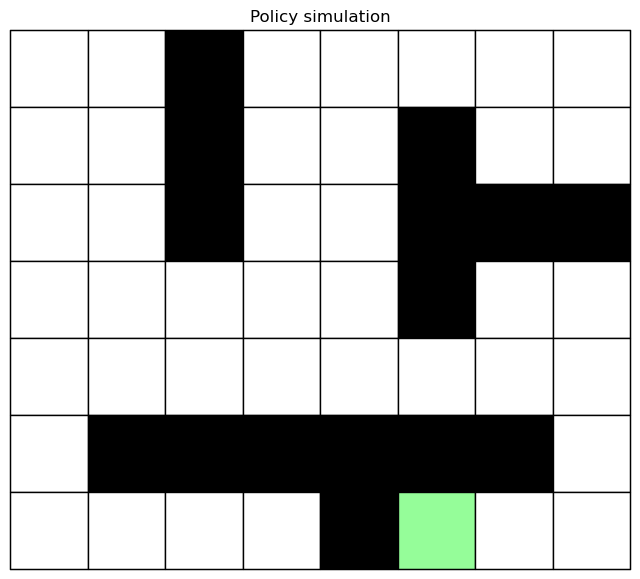

In [34]:
mz.animate_solution(env.maze, path, policy, env,'ValIter-Key')